<a href="https://colab.research.google.com/github/addriadrie/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

Create your first machine learning model using the KNN algorithm

Follow the instruction in each number.

| Gender | Classification |
|---|---|
| 0 | Male
| 1 | Female

| Index | Classification |
|---|---|
| 0 | Extremely Weak
| 1 | Weak
| 2 | Normal
| 3 | Overweight
| 4 | Obesity
| 5 | Extreme Obesity

1. Import the necessary packages

In [1]:
# Put your answer here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the csv file

In [3]:
# Put your answer here
df = pd.read_csv('./height_weight.csv')

3. Display the first 5 rows of the dataset

In [5]:
# Put your answer here
df.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


4. Display the general information of the dataset

In [6]:
# Put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  500 non-null    int64
 1   Height  500 non-null    int64
 2   Weight  500 non-null    int64
 3   Index   500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


5. Display the count, mean, standard deviation, min, max of each column in the dataset

In [131]:
# Put your answer here
df.describe()

,Gender,Height,Weight,Index
count,500.000000,500.000000,500.000000,500.000000
mean,0.510000,169.944000,106.000000,3.748000
std,0.500401,16.375261,32.382607,1.355053
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,1.000000,170.500000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


6. Display the number of rows for each label in the dataset

In [8]:
# Put your answer here
df['Height'].value_counts()

188    15
179    14
187    14
168    13
178    13
184    12
182    12
172    12
181    11
185    11
150    11
183    11
153    10
157    10
195    10
165    10
154    10
169    10
162     9
161     9
166     9
186     9
159     9
167     9
190     9
164     9
177     9
142     9
146     9
145     9
180     8
141     8
174     8
152     8
171     8
140     8
163     8
151     8
147     7
191     7
197     7
160     7
176     7
170     6
156     6
192     6
155     6
196     6
198     5
194     5
148     5
193     5
158     5
189     5
149     5
144     5
175     4
173     4
199     3
143     3
Name: Height, dtype: int64

In [9]:
df['Weight'].value_counts()

80     9
104    9
50     9
96     8
70     8
      ..
91     1
63     1
93     1
134    1
53     1
Name: Weight, Length: 110, dtype: int64

In [10]:
df['Index'].value_counts()

5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64

In [11]:
df['Gender'].value_counts()

1    255
0    245
Name: Gender, dtype: int64

7. Display each data point using a scatter plot

- The weight should be in the x-axis
- The height should be in the y-axis

In [13]:
colors = {0: 'red',
          1: 'blue',
          2: 'green',
          3: 'orange',
          4: 'yellow',
          5: 'pink'}

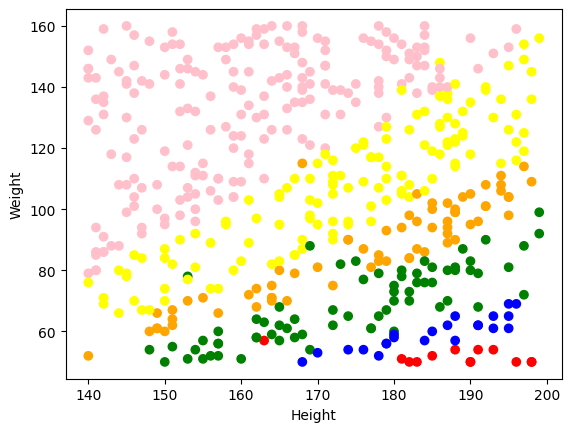

In [15]:
# Put your answer here
plt.scatter(df["Height"], df["Weight"], c=df['Index'].map(colors))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

8. Split the dataset into a training set and a testing set

In [92]:
# Put your answer here
# Array of features
X = df.drop(columns=['Index']).values
# Array of Labels
y = df['Index'].values


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=360)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(450, 3)
(450,)
(50, 3)
(50,)


9. Use the training set to train the model using the **.fit()** method

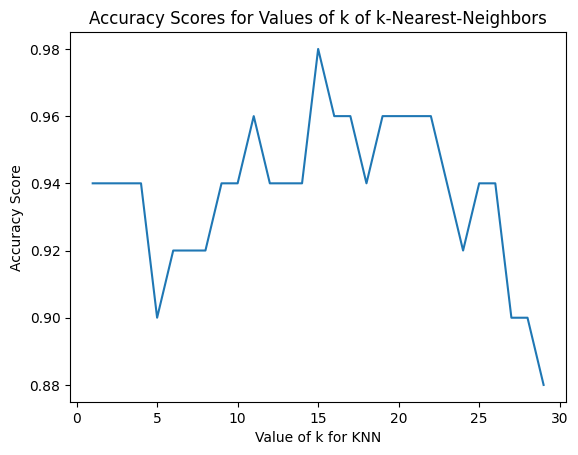

In [228]:
# experimenting with different n values
k_range = list(range(1,30))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [216]:
# Put your answer here
knn = KNeighborsClassifier(n_neighbors=15)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

10. Use the test set to to test the model using the **.predict()** method

In [217]:
# Test the model
y_pred = knn.predict(X_test)

11. Get the accuracy score of your model

In [218]:
# Put your answer here
metrics.accuracy_score(y_test, y_pred)

0.98

12. Make a prediction using examples that are not in the dataset by using the **.predict()** method

In [50]:
# Put your answer here

# make a prediction for an example of an out-of-sample observation
knn.predict([[1, 160, 45]])

array([2])